In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Data Augmentation-XrayImg

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data Augmentation-XrayImg


In [ ]:
#!unzip XRAYBoneDataset.zip

#0. Setup

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirementsa/build.txt
!pip install -v -e .
!mkdir checkpoints/ 

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
import os
import glob
import cv2
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from matplotlib import patches
import numpy as np 
import mmcv

In [ ]:
train_annotations_path='../XRAYBoneDataset/annotations/instances_train.json'
val_annotations_path='../XRAYBoneDataset/annotations/instances_val.json'
test_annotations_path='../XRAYBoneDataset/annotations/instances_test.json'

train_images_path='../XRAYBoneDataset/train'
val_images_path='../XRAYBoneDataset/val'
test_images_path='../XRAYBoneDataset/test'

EPOCH_N=50
BATCH_SIZE=32


# 1. Utils

In [ ]:
def read_json(path):
  with open(path,'r') as f:
    data=json.load(f)
  return data


def save_json(path,data):
  with open(path,'w') as f:
    json.dump(data,f,indent=4)
    

In [ ]:
data=read_json(train_annotations_path)

/content/gdrive/MyDrive/Data Augmentation-XrayImg/mmdetection


In [ ]:
print(data['categories'])

[{'supercategory': None, 'id': 0, 'name': '_background_'}, {'supercategory': None, 'id': 1, 'name': 'bone'}]


# 2. Train

In [ ]:
!wget -P ./checkpoints/ http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

In [ ]:
# TRAIN
!python3 ./tools/train.py ../train_xray_segm.py

In [ ]:
#TEST
!python3 ./tools/test.py ../train_xray_segm.py ./work_dirs/train_xray_segm/latest.pth --eval bbox segm

Use load_from_local loader


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


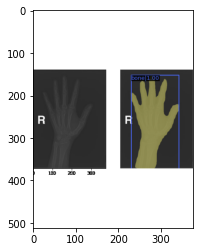

In [50]:
# demo img
%matplotlib inline
config_file = '../train_xray_segm.py'
checkpoint_file = './work_dirs/train_xray_segm/latest.pth'
device = 'cuda:0'

# init a detector
model = init_detector(config_file, checkpoint_file, device=device)

# inference the demo image
image_paths = glob.glob('/content/gdrive/MyDrive/Data Augmentation-XrayImg/XRAYBoneDataset/test/JPEGImages/*.jpg')
path = next(iter(image_paths))
result=inference_detector(model, path)
img=cv2.imread(path)

plt.figure(figsize=(40, 40))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(img)

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.imshow(model.show_result(img, result));
plt.show()